# Feature importance

* Permutaiton feature importance e.g. https://christophm.github.io/interpretable-ml-book/feature-importance.html


* Drop column feature importance


Obviously the first is much cheaper!

---

## 1. Permutation

In [44]:
path_to_model = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/processed_data/trained_models/V20_2016_tester/'

In [45]:
import pandas as pd

df_score = pd.read_parquet(path_to_model+'scores.parquet')


In [60]:
#Get training loss of null hypothesis i.e. model with no permutations
reference_score = df_score.query('features == "Model"').scores.values

#Create a normalised score w.r.t reference value
df_score['score_normalized'] = df_score.scores - reference_score

df_score = df_score.sort_values(by=['score_normalized']).reset_index(drop=True)

In [61]:
df_score

,features,scores,score_normalized
0,Model,16.437466,0.000000
1,anor_v20,16.439306,0.001841
2,z_v20,16.442753,0.005287
3,anor_v15,16.453403,0.015938
4,dl_v20,16.473686,0.036221
5,isor_v20,16.508886,0.071421
6,slor_v20,16.509447,0.071981
7,sdor_v20,16.516535,0.079069
8,dl_v15,16.529594,0.092129
9,lsm_v20,16.621412,0.183947


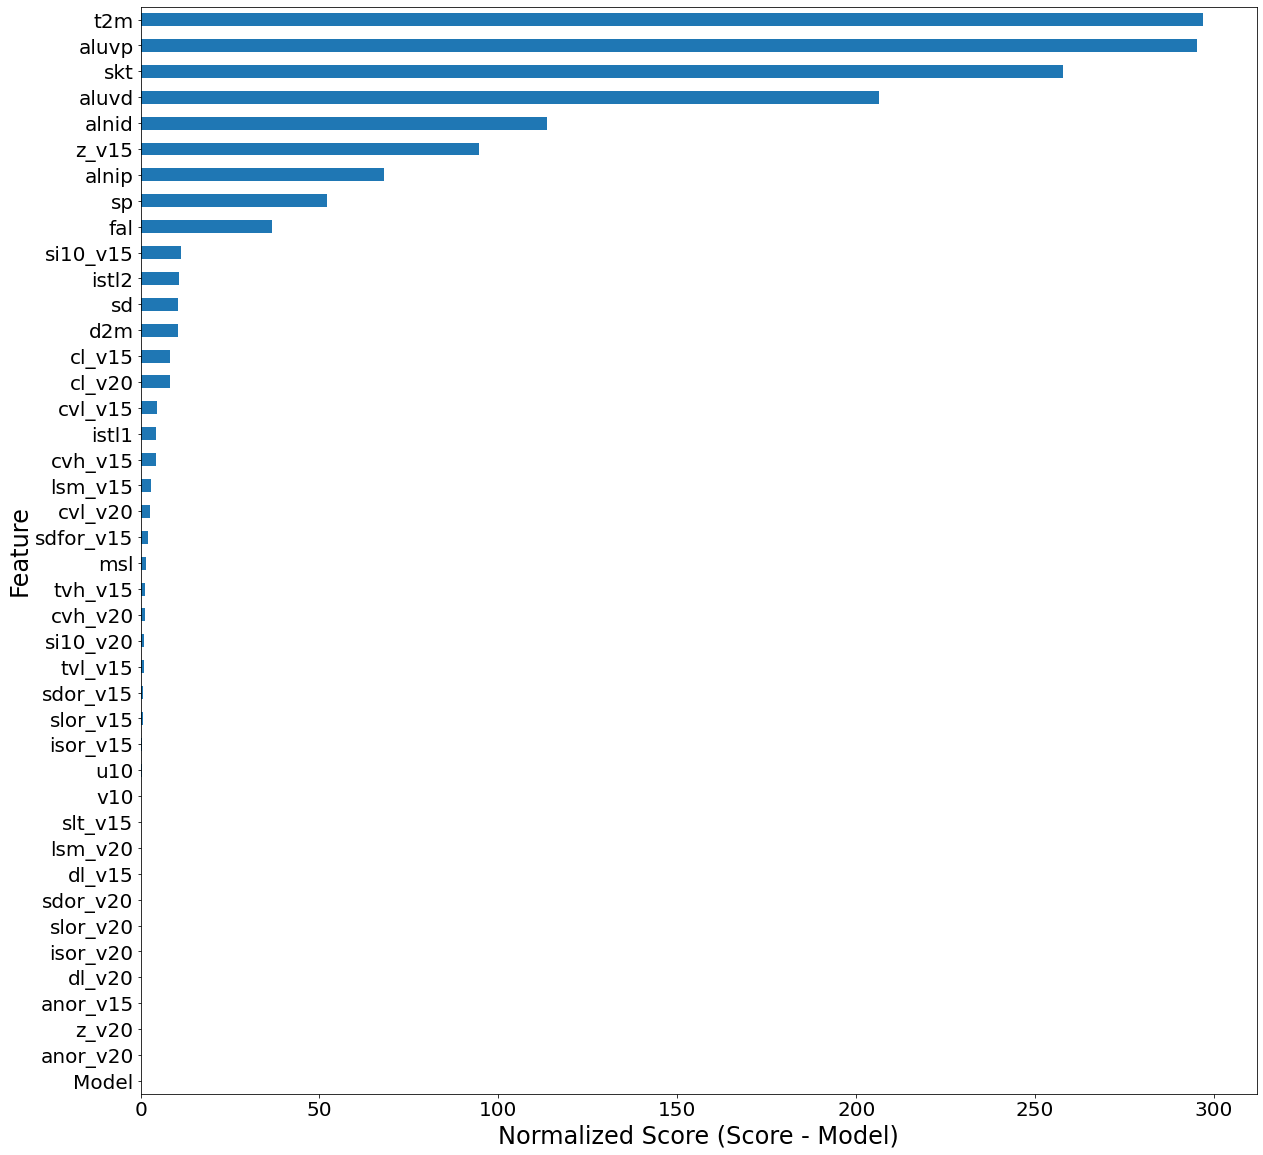

In [62]:
ax = df_score.plot.barh(x='features', y='score_normalized', rot=0,figsize=(20,20),legend=False)
ax.set_xlabel('Normalized Score (Score - Model)', fontdict={'fontsize':24})
ax.set_ylabel('Feature', fontdict={'fontsize':24})
ax.tick_params(axis='both', labelsize=20)



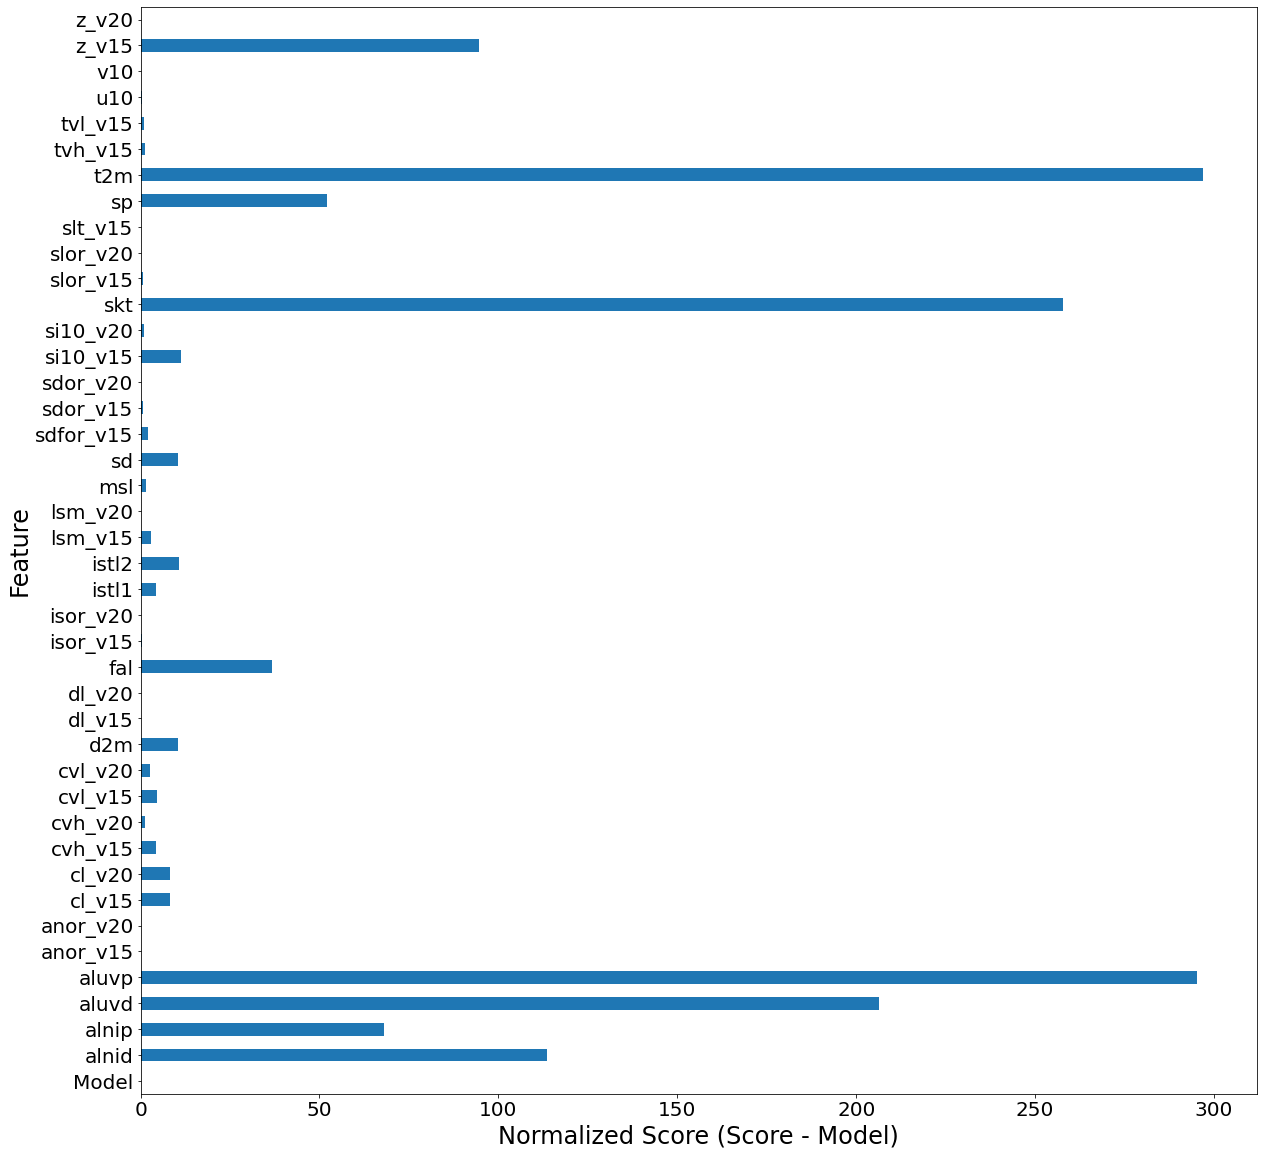

In [63]:
df_score = df_score.sort_values(by=['features']).reset_index(drop=True)
ax = df_score.plot.barh(x='features', y='score_normalized', rot=0,figsize=(20,20),legend=False)
ax.set_xlabel('Normalized Score (Score - Model)', fontdict={'fontsize':24})
ax.set_ylabel('Feature', fontdict={'fontsize':24})
ax.tick_params(axis='both', labelsize=20)


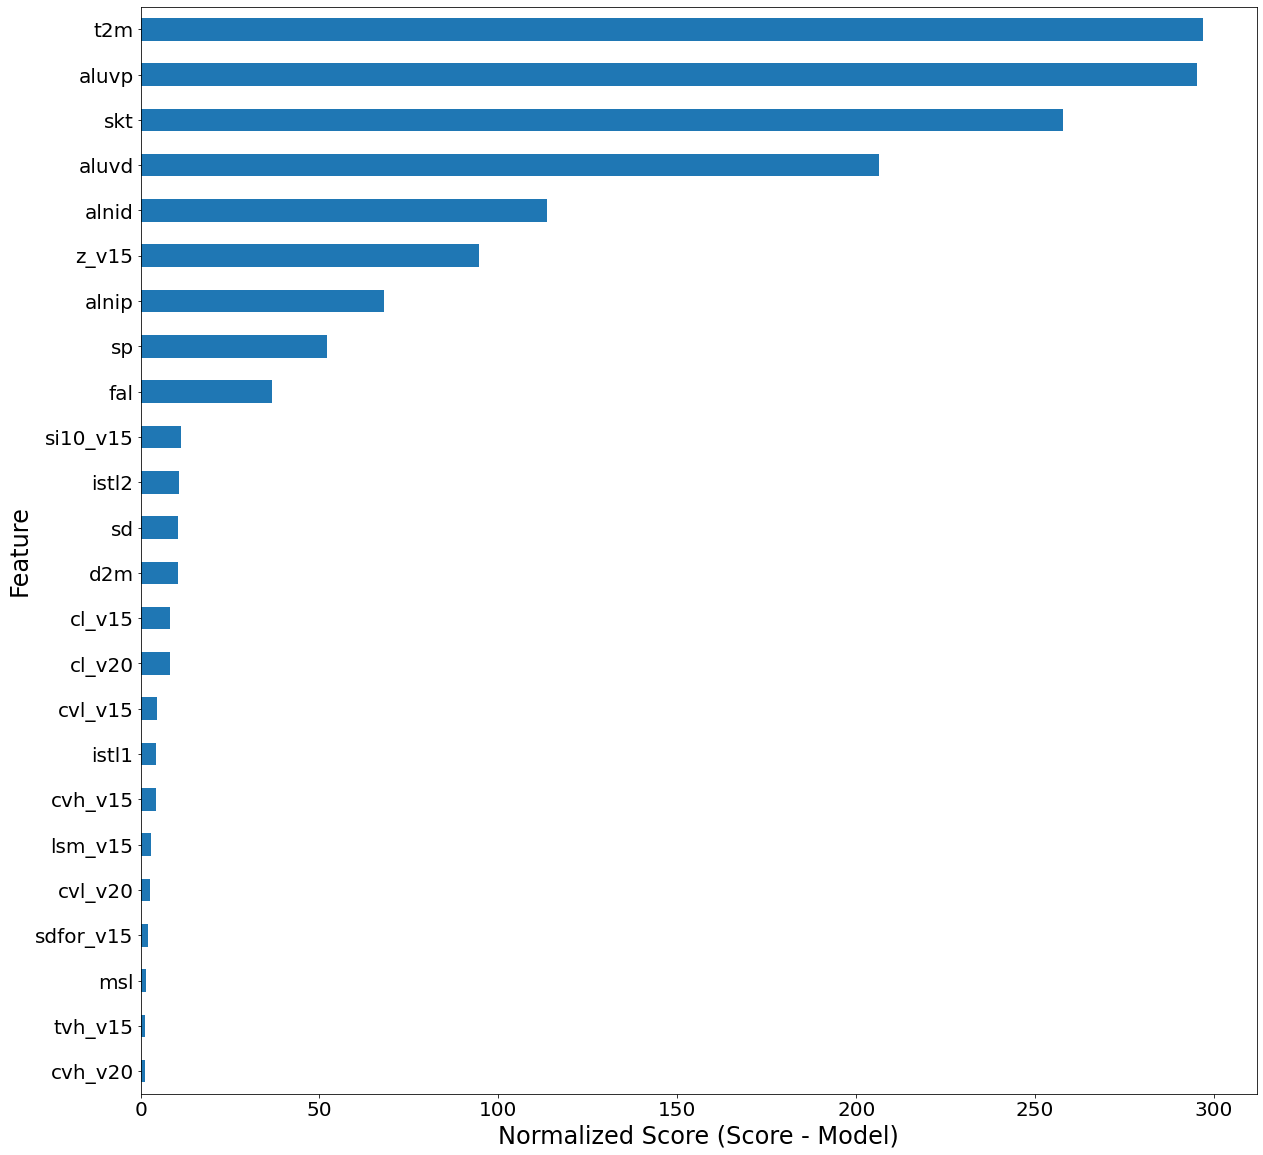

In [65]:
df_score = df_score.query('score_normalized > 1').sort_values(by=['score_normalized']).reset_index(drop=True)
ax = df_score.plot.barh(x='features', y='score_normalized', rot=0,figsize=(20,20),legend=False)
ax.set_xlabel('Normalized Score (Score - Model)', fontdict={'fontsize':24})
ax.set_ylabel('Feature', fontdict={'fontsize':24})
ax.tick_params(axis='both', labelsize=20)


# 2. Permutation - just |delta cl| > 0.1

In [71]:
path_to_model = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/processed_data/trained_models/V20_2016_augmented/'
df_score_cl = pd.read_parquet(path_to_model+'scores_cl.parquet')

In [72]:
#Get training loss of null hypothesis i.e. model with no permutations
reference_score = df_score_cl.query('features == "Model"').scores.values

#Create a normalised score w.r.t reference value
df_score_cl['score_normalized'] = df_score_cl.scores - reference_score

df_score_cl = df_score_cl.sort_values(by=['score_normalized']).reset_index(drop=True)

In [73]:
display(df_score_cl)

,features,scores,score_normalized
0,z_v20,15.819231,-0.000082
1,Model,15.819313,0.000000
2,anor_v20,15.823565,0.004252
3,isor_v20,15.823801,0.004488
4,dl_v20,15.835073,0.015759
5,slor_v20,15.837102,0.017789
6,anor_v15,15.839809,0.020496
7,dl_v15,15.856087,0.036774
8,sdor_v20,15.870904,0.051591
9,u10,15.970443,0.151130


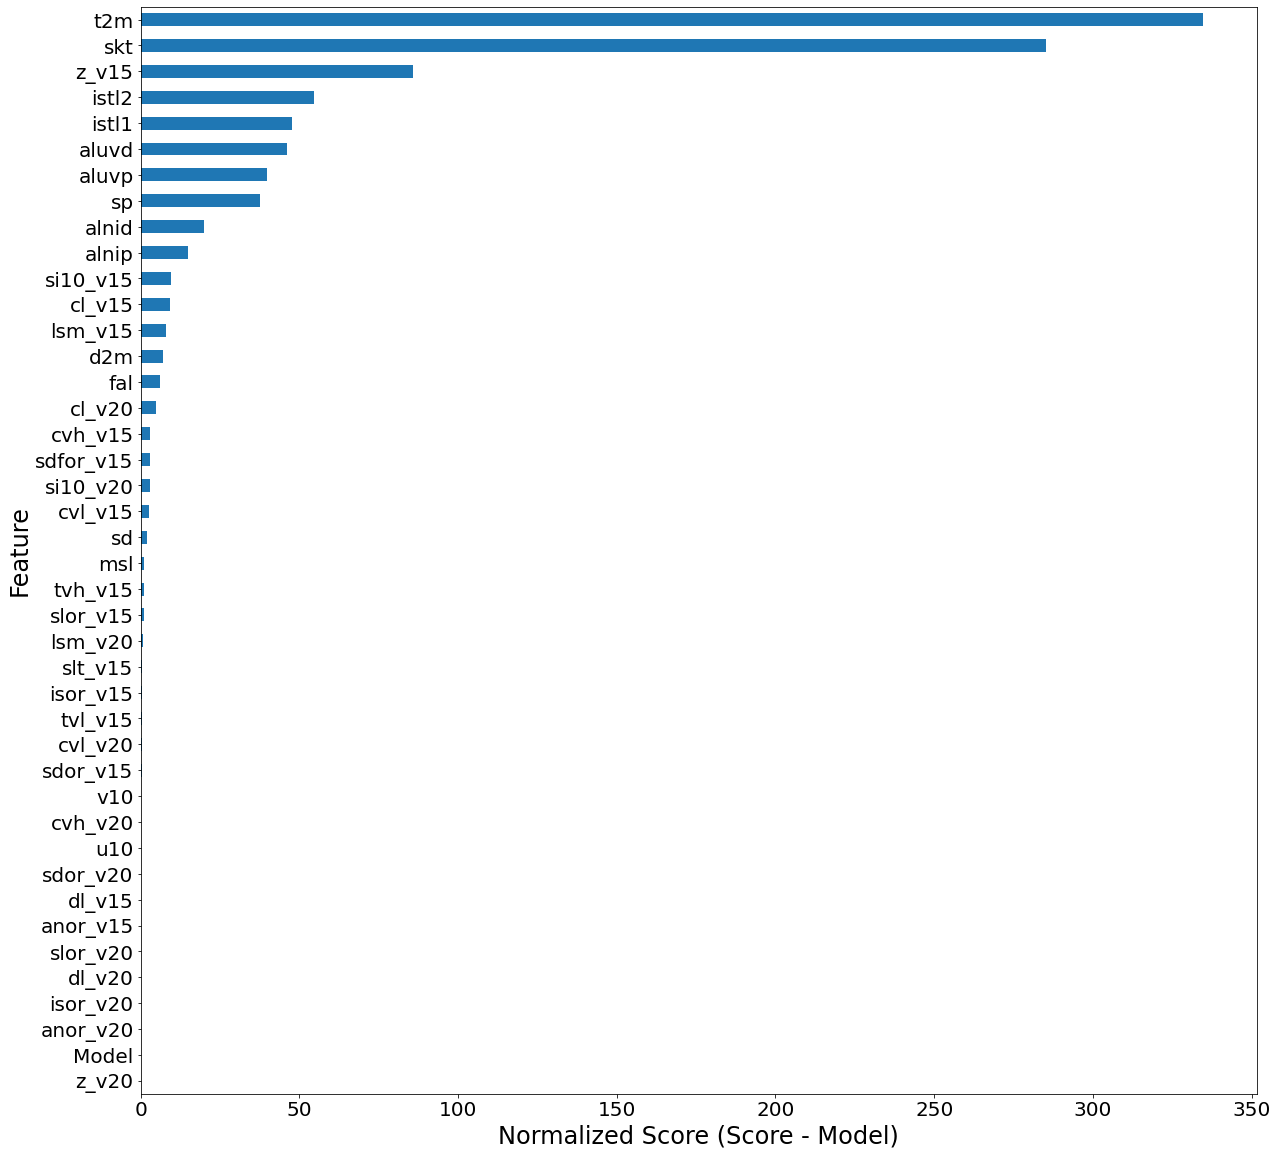

In [74]:
ax = df_score_cl.plot.barh(x='features', y='score_normalized', rot=0,figsize=(20,20),legend=False)
ax.set_xlabel('Normalized Score (Score - Model)', fontdict={'fontsize':24})
ax.set_ylabel('Feature', fontdict={'fontsize':24})
ax.tick_params(axis='both', labelsize=20)

